In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

data_dir = "cropped_images"

classes = {
    'n02094433': 0,  
    'n02099429': 1,  
    'n02107142': 2,  
    'n02111500': 3   
}

IMG_HEIGHT = 64
IMG_WIDTH = 64

images = []
labels = []

for file_name in os.listdir(data_dir):
    file_path = os.path.join(data_dir, file_name)
    for class_id, label in classes.items():
        if class_id in file_name:
            img = cv2.imread(file_path)
            if img is not None:
                img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
                images.append(img)
                labels.append(label)
            break

images = np.array(images, dtype='float32')
labels = np.array(labels, dtype='int')

images = images / 255.0

X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, stratify=labels, random_state=42)

y_train = to_categorical(y_train, num_classes=len(classes))
y_val = to_categorical(y_val, num_classes=len(classes))



c:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.2770 - loss: 1.3844 - val_accuracy: 0.4655 - val_loss: 1.3455
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4642 - loss: 1.3244 - val_accuracy: 0.4138 - val_loss: 1.2675
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4355 - loss: 1.2223 - val_accuracy: 0.4828 - val_loss: 1.2248
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5030 - loss: 1.1529 - val_accuracy: 0.5172 - val_loss: 1.1482
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5615 - loss: 1.0513 - val_accuracy: 0.4569 - val_loss: 1.1501
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5872 - loss: 0.9907 - val_accuracy: 0.5517 - val_loss: 1.0617
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6481 - loss: 0.8718 - val_accuracy: 0.5172 - val_loss: 1.0677
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6465 - loss: 0.8273 - val_accuracy: 0.5517 - v

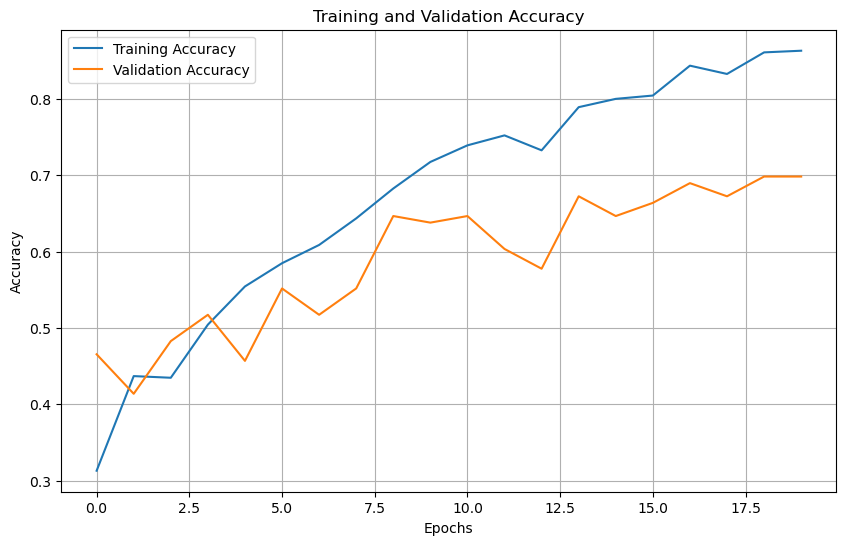

In [3]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

model = models.Sequential([

    layers.Conv2D(8, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(4, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=20, 
                    batch_size=32,
                    validation_split=0.2, 
                    verbose=1)

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


Banner ID: 916478184
(b) Train the CNN using 2 other number of filters: 8 and 16 for the 2nd convolution layer (i) with
all other parameters unchanged

Training model with 8 filters in the second convolutional layer...
Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.3073 - loss: 1.3880 - val_accuracy: 0.3362 - val_loss: 1.3844
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3699 - loss: 1.3462 - val_accuracy: 0.3966 - val_loss: 1.3526
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4182 - loss: 1.2901 - val_accuracy: 0.3879 - val_loss: 1.2895
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4150 - loss: 1.2473 - val_accuracy: 0.4310 - val_loss: 1.2276
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5164 - loss: 1.1496 - val_accuracy: 0.4397 - val_loss: 1.2900
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5792 - loss: 1.1042 - val_accuracy: 0.4914 - val_loss: 1.1738
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5596 - loss: 1.0464 - val_accuracy: 0.5776 - val_loss: 1.0932
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12m

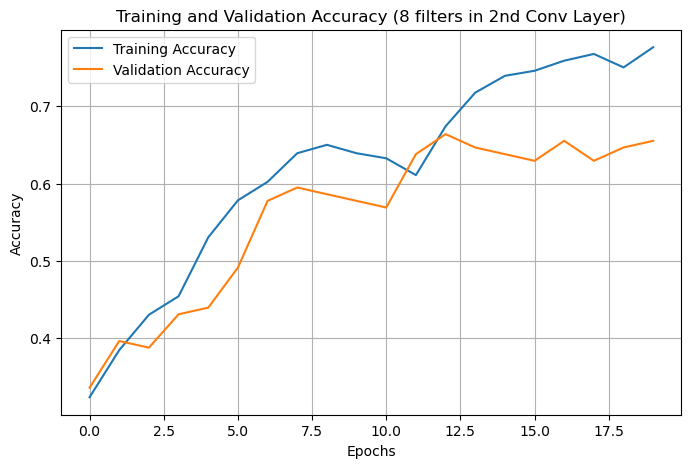

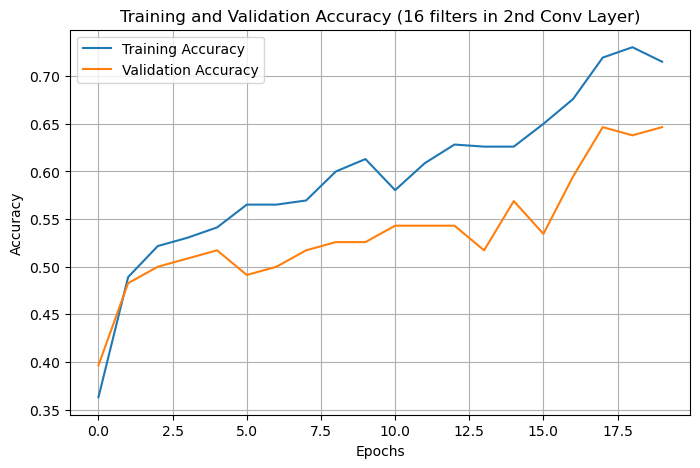

In [ ]:

def build_cnn(num_filters_second_layer):
    model = models.Sequential([
        layers.Conv2D(8, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(num_filters_second_layer, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(8, activation='relu'),
        layers.Dense(4, activation='softmax')
    ])
    return model

histories = {}

for num_filters in [8, 16]:
    print(f"Training model with {num_filters} filters in the second convolutional layer...")
    model = build_cnn(num_filters)
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(X_train, y_train,
                        epochs=20,
                        batch_size=32,
                        validation_split=0.2,
                        verbose=1)
    histories[num_filters] = history

for num_filters, history in histories.items():
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Training and Validation Accuracy ({num_filters} filters in 2nd Conv Layer)')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()



The first model with 4 filters in the 2nd Conv Layer shows signs of underfitting, as it has fewer filters and, consequently, less capacity to learn complex patterns. The second model with 8 filters in the 2nd Conv strikes a balance between underfitting and overfitting. It’s likely a better fit for the dataset as the gap between training and validation accuracy is small. It is just right for this dataset. Third model shows signs of overfitting, as it may capture noise and irrelevant details in the training data, leading to more gap between training and validation performance.